In [6]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [7]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("fedesoriano/electric-power-consumption")

print("Path to dataset files:", path)

100%|██████████| 1.36M/1.36M [00:00<00:00, 107MB/s]

Extracting files...
Path to dataset files: /root/.cache/kagglehub/datasets/fedesoriano/electric-power-consumption/versions/1


In [8]:
ele=pd.read_csv("/root/.cache/kagglehub/datasets/fedesoriano/electric-power-consumption/versions/1/powerconsumption.csv")

In [ ]:
ele

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964
...,...,...,...,...,...,...,...,...,...
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504


In [ ]:
ele.head()

,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
0,1/1/2017 0:00,6.559,73.8,0.083,0.051,0.119,34055.69620,16128.87538,20240.96386
1,1/1/2017 0:10,6.414,74.5,0.083,0.070,0.085,29814.68354,19375.07599,20131.08434
2,1/1/2017 0:20,6.313,74.5,0.080,0.062,0.100,29128.10127,19006.68693,19668.43373
3,1/1/2017 0:30,6.121,75.0,0.083,0.091,0.096,28228.86076,18361.09422,18899.27711
4,1/1/2017 0:40,5.921,75.7,0.081,0.048,0.085,27335.69620,17872.34043,18442.40964


In [ ]:
ele.tail()


,Datetime,Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2,PowerConsumption_Zone3
52411,12/30/2017 23:10,7.010,72.4,0.080,0.040,0.096,31160.45627,26857.31820,14780.31212
52412,12/30/2017 23:20,6.947,72.6,0.082,0.051,0.093,30430.41825,26124.57809,14428.81152
52413,12/30/2017 23:30,6.900,72.8,0.086,0.084,0.074,29590.87452,25277.69254,13806.48259
52414,12/30/2017 23:40,6.758,73.0,0.080,0.066,0.089,28958.17490,24692.23688,13512.60504
52415,12/30/2017 23:50,6.580,74.1,0.081,0.062,0.111,28349.80989,24055.23167,13345.49820


In [ ]:
ele.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 52416 entries, 0 to 52415
Data columns (total 9 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Datetime                52416 non-null  object 
 1   Temperature             52416 non-null  float64
 2   Humidity                52416 non-null  float64
 3   WindSpeed               52416 non-null  float64
 4   GeneralDiffuseFlows     52416 non-null  float64
 5   DiffuseFlows            52416 non-null  float64
 6   PowerConsumption_Zone1  52416 non-null  float64
 7   PowerConsumption_Zone2  52416 non-null  float64
 8   PowerConsumption_Zone3  52416 non-null  float64
dtypes: float64(8), object(1)
memory usage: 3.6+ MB


In [ ]:
ele.isnull().sum()

,0
Datetime,0
Temperature,0
Humidity,0
WindSpeed,0
GeneralDiffuseFlows,0
DiffuseFlows,0
PowerConsumption_Zone1,0
PowerConsumption_Zone2,0
PowerConsumption_Zone3,0


In [ ]:
ind=ele[["Temperature","Humidity","WindSpeed","GeneralDiffuseFlows","DiffuseFlows","PowerConsumption_Zone1","PowerConsumption_Zone2"]]
dep=ele["PowerConsumption_Zone3"]
LR=LinearRegression()
LR.fit(ind,dep)


LinearRegression()

In [ ]:
Temperature=float(input("Enter the temperature:"))
Humidity=float(input("Enter the Humidity:"))
WindSpeed=float(input("Enter the windspeed:"))
GeneralDiffuseFlows=float(input("Enter the GeneralDiffuseFlows:"))
DiffuseFlows=float(input("Enter the DiffuseFlows:"))
PowerConsumption_Zone1=float(input("Enter the PowerConsumption_Zone1:"))
PowerConsumption_Zone2=float(input("Enter the PowerConsumption_Zone2:"))
pred=([[Temperature,Humidity,WindSpeed,GeneralDiffuseFlows,DiffuseFlows,PowerConsumption_Zone1,PowerConsumption_Zone2]])
result = LR.predict(pred)

print("Predicted PowerConsumption_Zone3:", result[0])

Enter the temperature:6.559
Enter the Humidity:73.8
Enter the windspeed:0.083
Enter the GeneralDiffuseFlows:0.051
Enter the DiffuseFlows:0.119
Enter the PowerConsumption_Zone1:34055.6962
Enter the PowerConsumption_Zone2:16128.87538
Predicted PowerConsumption_Zone3: 17596.230100521556


/usr/local/lib/python3.12/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


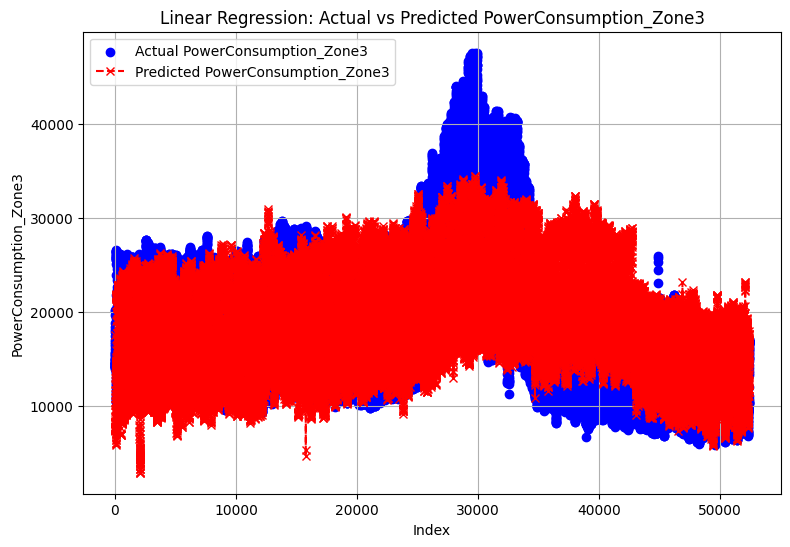

In [9]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset (assuming the path is correct from previous steps)
ele=pd.read_csv("/root/.cache/kagglehub/datasets/fedesoriano/electric-power-consumption/versions/1/powerconsumption.csv")

# Define independent and dependent variables
ind=ele[["Temperature","Humidity","WindSpeed","GeneralDiffuseFlows","DiffuseFlows","PowerConsumption_Zone1","PowerConsumption_Zone2"]]
dep=ele["PowerConsumption_Zone3"]

# Initialize and fit the Linear Regression model
LR=LinearRegression()
LR.fit(ind,dep)

# Calculate predictions for the entire dataset
predicted_powerconsumption_zone3 = LR.predict(ind)

plt.figure(figsize=(9,6))

plt.scatter(ele.index, ele['PowerConsumption_Zone3'], color='blue', marker='o', linestyle='-', label='Actual PowerConsumption_Zone3')
plt.plot(ele.index, predicted_powerconsumption_zone3, color='red', marker='x', linestyle='--', label='Predicted PowerConsumption_Zone3')

plt.xlabel('Index') # Changed label from 'Temperature' as x-axis is ele.index
plt.ylabel('PowerConsumption_Zone3')
plt.title('Linear Regression: Actual vs Predicted PowerConsumption_Zone3')
plt.legend()
plt.grid(True)
plt.show()

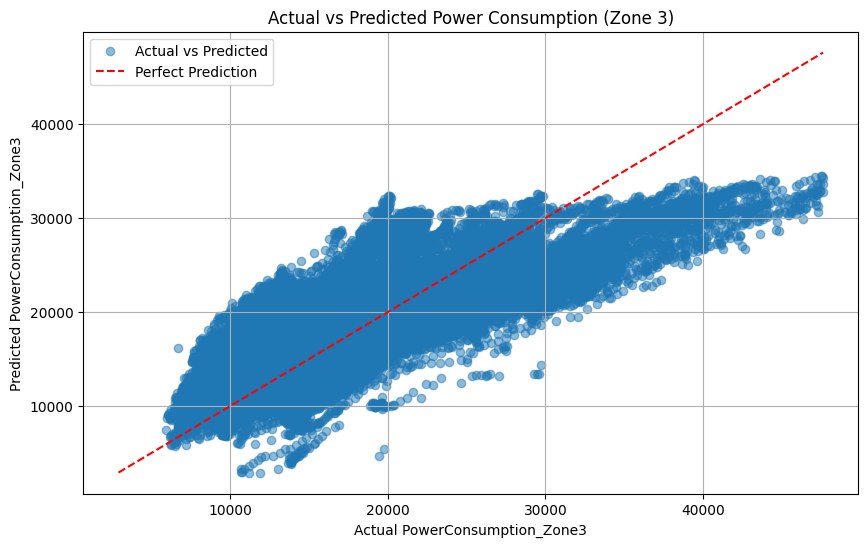

In [20]:
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the dataset
ele=pd.read_csv("/root/.cache/kagglehub/datasets/fedesoriano/electric-power-consumption/versions/1/powerconsumption.csv")

# Define independent and dependent variables
ind=ele[["Temperature","Humidity","WindSpeed","GeneralDiffuseFlows","DiffuseFlows","PowerConsumption_Zone1","PowerConsumption_Zone2"]]
dep=ele["PowerConsumption_Zone3"]

# Initialize and fit the Linear Regression model
LR=LinearRegression()
LR.fit(ind,dep)

# Calculate predictions once
predicted_values = LR.predict(ind)

# ----------- GRAPH 1: ACTUAL VS PREDICTED SCATTER PLOT ------------
plt.figure(figsize=(10,6))
plt.scatter(dep, predicted_values, alpha=0.5, label='Actual vs Predicted')

# Add a line representing perfect prediction (y=x)
min_val = min(dep.min(), predicted_values.min())
max_val = max(dep.max(), predicted_values.max())
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction')

plt.xlabel("Actual PowerConsumption_Zone3")
plt.ylabel("Predicted PowerConsumption_Zone3")
plt.title("Actual vs Predicted Power Consumption (Zone 3)")
plt.legend()
plt.grid(True)
plt.show()